# DATA POINT MAKER

In [9]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit

In [10]:
plt.rcParams['font.size'] = 19
plt.rcParams['axes.linewidth'] = 1.5

In [11]:
file_path = '/Users/thomasgaehtgens/Desktop/LFEA/Ótica Coerente/Dados/1a_sesh/'
TEM_files = ['tem1normal.tif', 'tem2normal.tif', 'tem3normal.tif']

### Funções Auxiliares

In [12]:
def img_to_matrix(img):
    width, height = img.size
    pixels = img.load() #returns dictionary where each entry has rgb values
    
    matrix = list()
    row  = list()
    for y in range(height):
        row = []
        for x in range(width):
            row += [pixels[x, y]]
        matrix.append(row)
    return matrix
    
def soma_linhas(pixels, orientation='x'):
    if orientation=='x':
        soma = list()
        for i in range(width):
            soma += [0]
        for i in range(height):
            for j in range(width):
                soma[j] += pixels[i][j]
        return soma
    else:
        soma = list()
        for i in range(height):
            soma += [0]
        for i in range(width):
            for j in range(height):
                soma[j] += pixels[j][i]
        return soma
            
def normalize(linha):
    res = list()
    peak = max(linha)
    for ponto in linha:
        res.append(ponto/peak)
    return res 

#CONSTANTES
l  = 633e-9
fl = 0.208 #INVENTAMOS UM VALOR PARA ESTA DISTÂNCIA FOCAL?
A  = 0.51
pc = 3.69e-6

def get_d(pixel_distance):
    return 2*A*l*fl/(pixel_distance*pc)

## TEM: Parâmetro d

In [29]:
img = Image.open(file_path + TEM_files[2])
img = img.rotate(16) #FOR TEMIII

width, height = img.size

pixels = img_to_matrix(img)
linha = soma_linhas(pixels)

In [30]:
coords = [
#[958 ,   27],
#[1319,   21],
    
[250 ,  370],
[606 ,  378],
[950 ,  381],
[1301,  385],
[1674,  379],
    
[253 ,  719],
[605 ,  722],
[1291,  730],
[1663,  738],
    
[245 , 1074],
[600 , 1066],
[943 , 1069],
[1291, 1078],
[1664, 1099]

    
#,[592 , 1432],
#[942 , 1430]
]

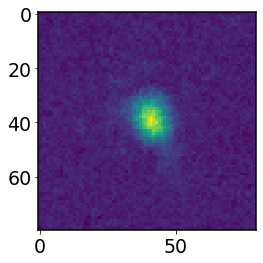

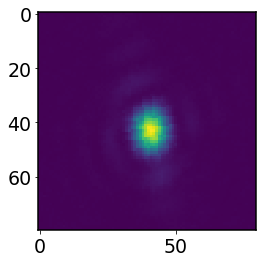

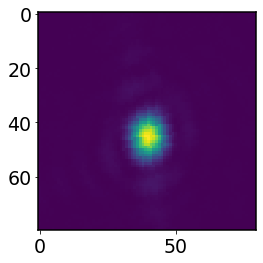

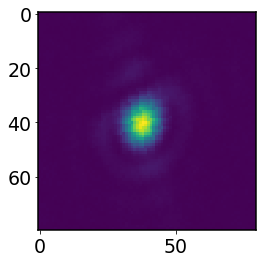

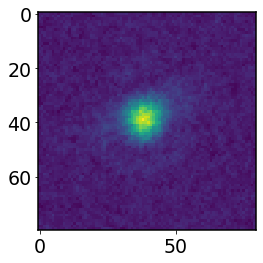

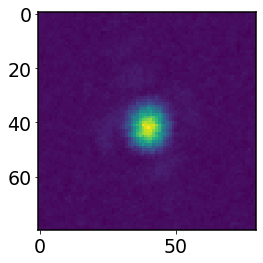

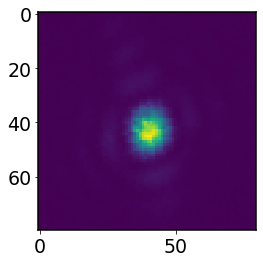

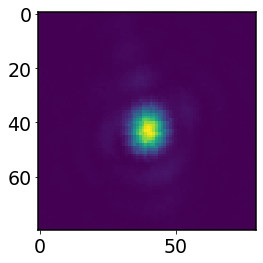

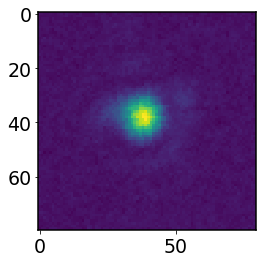

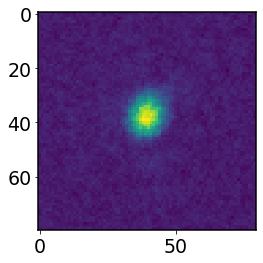

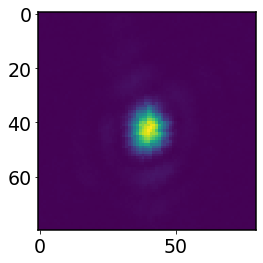

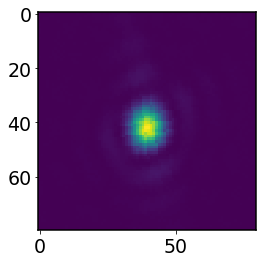

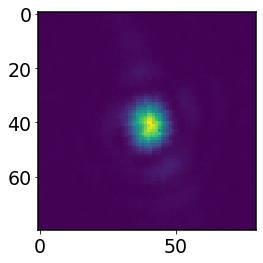

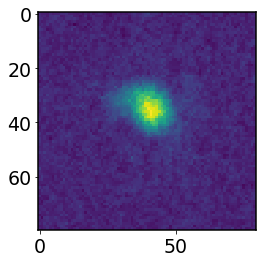

In [31]:
linhas_x = list()

for locl in range(len(coords)):
    fig = plt.figure()
    
    side = 40
    #locl = 13 #ponto (3, 4)

    region = img.crop((coords[locl][0] - side, coords[locl][1] - side,coords[locl][0] + side, coords[locl][1] + side))
    width, height = region.size
    
    pixels = img_to_matrix(region)
    linha  = soma_linhas(pixels)
    
    plt.imshow(region)

    #dist = list()
    #for i in range(2*side):
    #    dist.append(get_d(coords[locl][0] - side + i))
    
    linhas_x.append(linha)

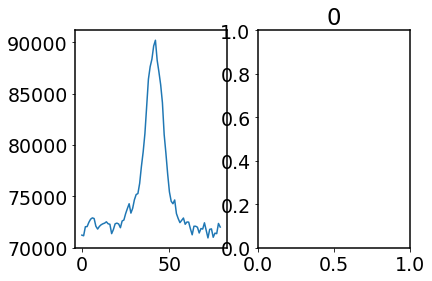

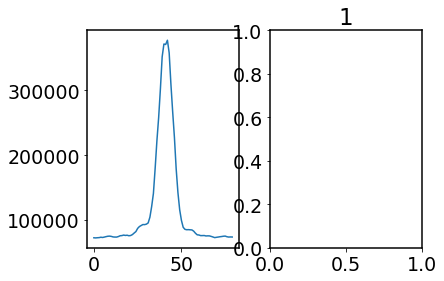

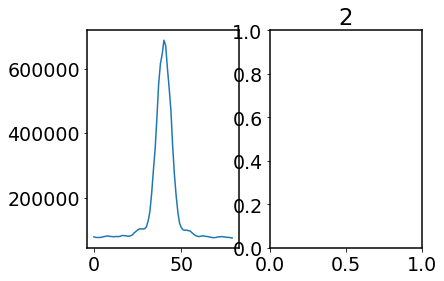

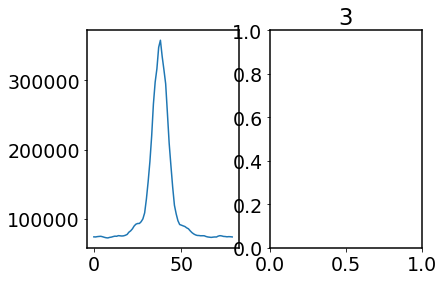

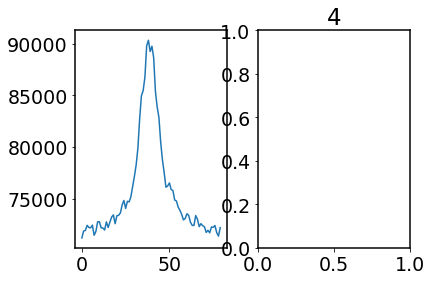

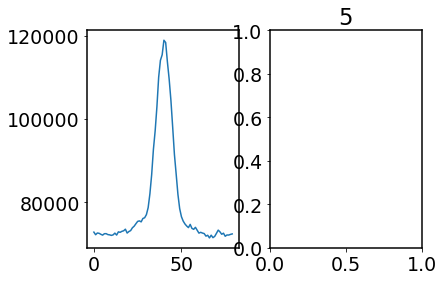

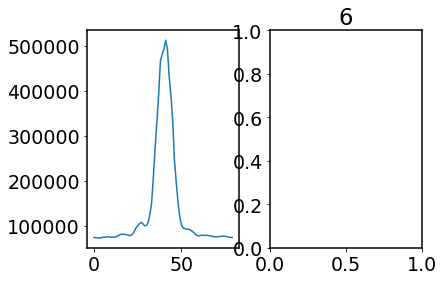

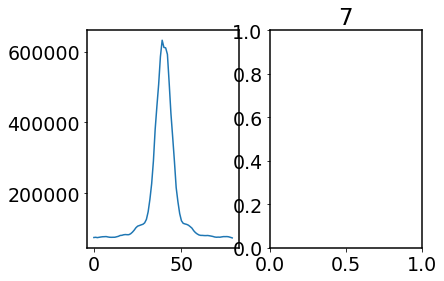

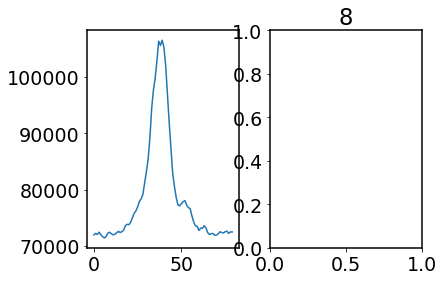

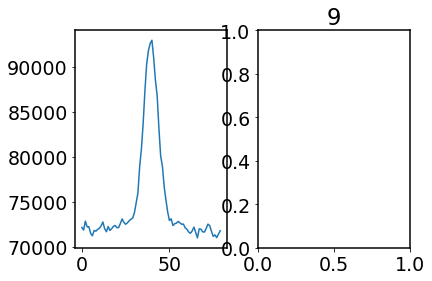

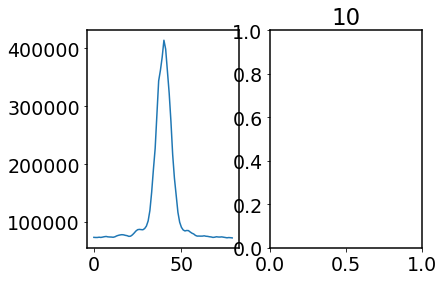

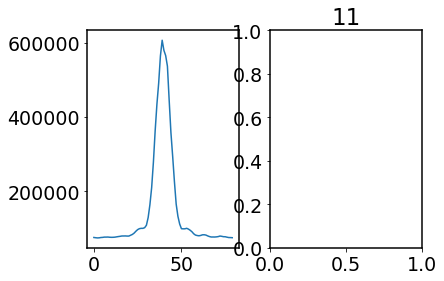

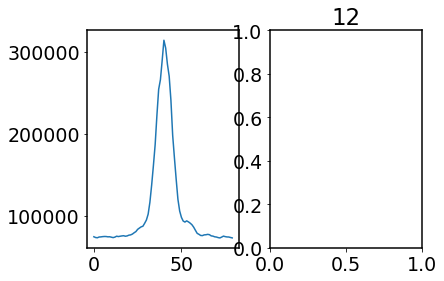

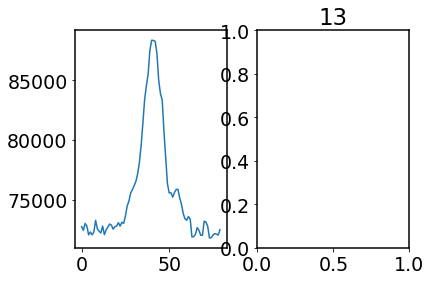

In [33]:
for i in range(len(linhas_x)):
    fig = plt.figure()
    ax1 = fig.add_subplot(1,2,1)
    ax1.plot(linhas_x[i])
    ax2 = fig.add_subplot(1,2,2)
    #ax2.plot(linhas_y[i])
    plt.title(str(i))

In [ ]:
file=open("HTEM2_(2, 3).txt",'w')
file.write(str(linhas_x[7]))
file.close()

file=open("VTEM2_(2, 3).txt",'w')
file.write(str(linhas_y[7]))
file.close()

In [18]:
file=open("HTEM2_(3, 2).txt",'w')
file.write(str(linhas_x[11]))
file.close()

file=open("VTEM2_(3, 2).txt",'w')
file.write(str(linhas_y[11]))
file.close()

NameError: name 'linhas_y' is not defined

# TEM: Parâmetro a

In [19]:
img = Image.open(file_path + TEM_files[0])
width, height = img.size

pixels = img_to_matrix(img)
linha = soma_linhas(pixels)

In [20]:
x

NameError: name 'x' is not defined

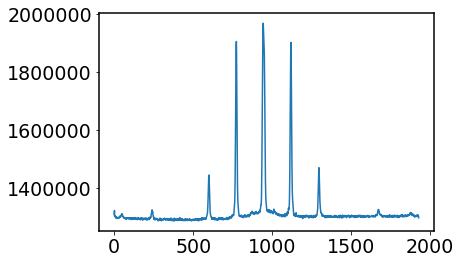

In [21]:
x = list()
for i in range(len(linha)):
    x.append(get_d(i + 1))
    
plt.plot(linha)

In [22]:
len(pixels[0])

1928

In [23]:
max(pixels[1000])
#min(pixels[1])

1024

In [24]:
type(pixels[0, 0])

TypeError: list indices must be integers or slices, not tuple

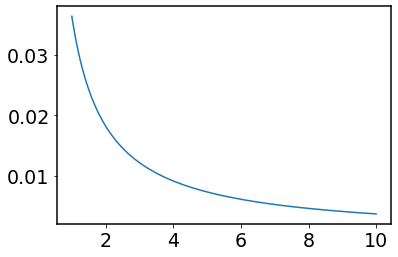

In [25]:
x = np.linspace(1, 10, 1000)
plt.plot(x, get_d(x))